## Flower Species Classification

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense,Flatten,Conv2D
from tensorflow.keras.models import Sequential
import os
import cv2
from PIL import Image
import sys

In [43]:
os.listdir()

['.ipynb_checkpoints',
 'daisy',
 'daisy_reshaped',
 'dandelion',
 'dandelion_reshaped',
 'flowers',
 'flowers_model.h5',
 'flowers_model1.h5',
 'Flower_classification.ipynb',
 'Flower_Classification_1.html',
 'Flower_Classification_1.ipynb',
 'predictit.jpg',
 'rose',
 'rose_reshaped',
 'sunflower',
 'sunflower_reshaped',
 'tulip',
 'tulip_reshaped']

In [44]:
dandelion=os.listdir('dandelion_reshaped')
sunflower=os.listdir('sunflower_reshaped')
tulip=os.listdir('tulip_reshaped')

In [45]:
species=['dandelion','sunflower','tulip']

In [7]:
# to store each species of the flower in seperate array named after the species (no need to execute this)
print(type(dandelion[0]))
count=0


dadneliondata=[]
for file in dandelion:
    temp=cv2.imread("dandelion_reshaped/"+str(file),1)
    dadneliondata.append(temp)
print(len(dadneliondata))
sunflowerdata=[]
for file in sunflower:
    temp1=cv2.imread("sunflower_reshaped/"+str(file),1)
    sunflowerdata.append(temp1)
print(len(sunflowerdata))
tulipdata=[]
for file in tulip:
    temp=cv2.imread("tulip_reshaped/"+str(file),1)
    tulipdata.append(temp)
print(len(tulipdata))


<class 'str'>
1052
729
976


In [46]:
print(type(dandelion[0]))
count=0
X=[]
for file in dandelion:
    temp=cv2.imread("dandelion_reshaped/"+str(file),1)
    X.append(temp)
print(len(X))
for file in sunflower:
    temp1=cv2.imread("sunflower_reshaped/"+str(file),1)
    X.append(temp1)
print(len(X))
for file in tulip:
    temp=cv2.imread("tulip_reshaped/"+str(file),1)
    X.append(temp)
print(len(X))


<class 'str'>
1052
1781
2757


In [47]:
#xonvert list to numpy array
X=np.array(X)
print(X.shape)

(2757, 150, 150, 3)


In [48]:
#create output list Y 
Y=[]
for i in range(0,1052):
    Y.append(0)
for i in range(1052,1781):
    Y.append(1)
for i in range(1781,2757):
    Y.append(2)

Y=np.array(Y)
Y.shape

(2757,)

In [11]:
#just to convert individual list into np array (no need to execute this)
dadneliondata=np.array(dadneliondata)
sunflowerdata=np.array(sunflowerdata)
tulipdata=np.array(tulipdata)


print(dadneliondata.shape)
print(sunflowerdata.shape)
print(tulipdata.shape)


(1052, 150, 150, 3)
(729, 150, 150, 3)
(976, 150, 150, 3)


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [79]:
X_train=np.array(X_train)
X_test=np.array(X_test)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
#To find number of classes
k=np.unique(Y_train)
print(k)
K=len(k)
print(K)

(2205, 150, 150, 3)
(2205,)
(552, 150, 150, 3)
(552,)
[0 1 2]
3


In [81]:
X_train=X_train/255.0

In [82]:
X_test=X_test/255.0

Text(0.5, 1.0, 'sunflower')

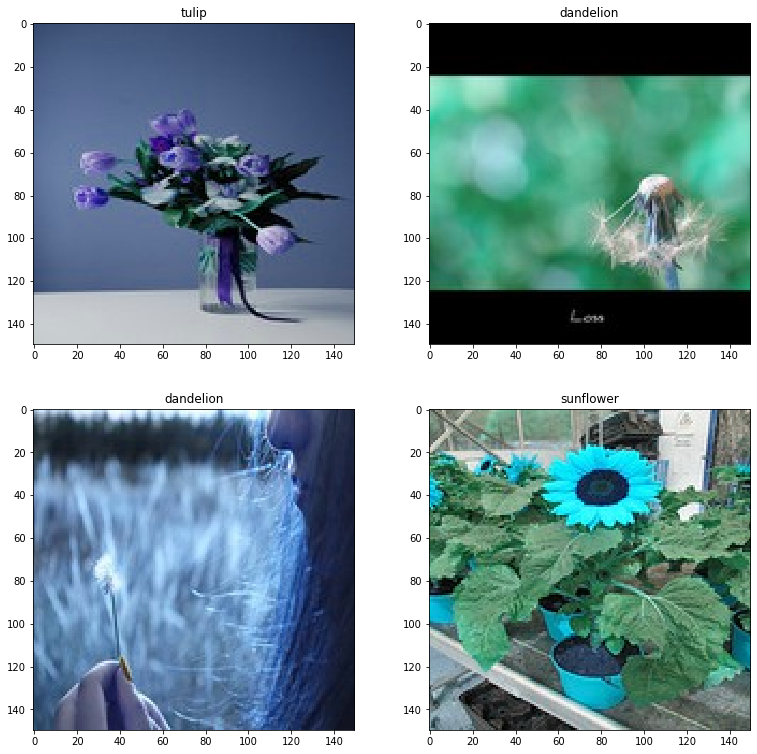

In [83]:
f,ax = plt.subplots(2,2,figsize=(13,13))
ax[0,0].imshow(X_train[0])
ax[0,0].set_title(str(species[(Y_train[0])]))
ax[0,1].imshow(X_train[50])
ax[0,1].set_title(str(species[(Y_train[50])]))
ax[1,0].imshow(X_train[100])
ax[1,0].set_title(str(species[(Y_train[100])]))
ax[1,1].imshow(X_train[106])
ax[1,1].set_title(str(species[(Y_train[106])]))

In [84]:
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow import keras
from tensorflow.keras.layers import Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [85]:
batch_size=128
epochs=25

from tensorflow.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

### Data Augmentation

In [91]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, -10 to 10)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

### Build a model

In [87]:
i=Input(shape=X_train[0].shape)
X=Conv2D(32,(3,3),strides=(1,1),activation='relu')(i)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Conv2D(64,(3,3),strides=(1,1),activation='relu')(X)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Conv2D(96,(3,3),strides=(1,1),activation='relu')(X)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Conv2D(96,(3,3),strides=(1,1),activation='relu')(X)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Flatten()(X)
X=Dense(512,activation='relu')(X)
#X=Dropout(0.2)(X)
X=Dense(3,activation='softmax')(X)
#X=Dropout(0.2)(X)
model=Model(i,X)

In [88]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 96)        0     

### Compile and Fit

In [89]:
model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [92]:
History = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 17 steps, validate on 552 samples
Epoch 1/25
17/17 [==============================] - 59s 3s/step - loss: 1.0650 - accuracy: 0.4107 - val_loss: 0.8352 - val_accuracy: 0.6087
Epoch 2/25
17/17 [==============================] - 53s 3s/step - loss: 0.8082 - accuracy: 0.6389 - val_loss: 0.6889 - val_accuracy: 0.7355
Epoch 3/25
17/17 [==============================] - 52s 3s/step - loss: 0.6990 - accuracy: 0.7097 - val_loss: 0.5976 - val_accuracy: 0.7627
Epoch 4/25
17/17 [==============================] - 49s 3s/step - loss: 0.6426 - accuracy: 0.7429 - val_loss: 0.5583 - val_accuracy: 0.7880
Epoch 5/25
17/17 [==============================] - 47s 3s/step - loss: 0.6118 - accuracy: 0.7419 - val_loss: 0.5574 - val_accuracy: 0.7989
Epoch 6/25
17/17 [==============================] - 50s 3s/step - loss: 0.5811 - accuracy: 0.7721 - val_loss: 0.6211 - val_accuracy: 0.7283
Epoch 7/25
17/1

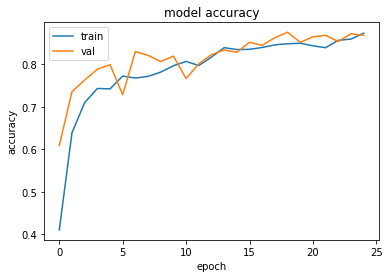

In [93]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

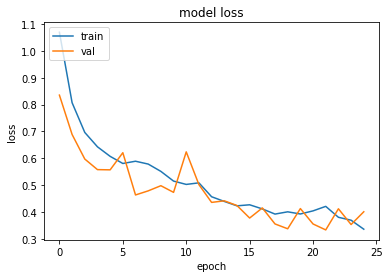

In [94]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [95]:
model.save('flowers_model2.h5') 

In [98]:
from tensorflow.keras.models import load_model

In [100]:
model2 = load_model('flowers_model2.h5')

### Prediction

In [101]:
#To resize original image to standard format and saving it
img1 = Image.open('predictit.jpg')
imResize = img1.resize((150,150), Image.ANTIALIAS)
imResize.save('predictit.jpg', 'JPEG', quality=90)


(1, 150, 150, 3)

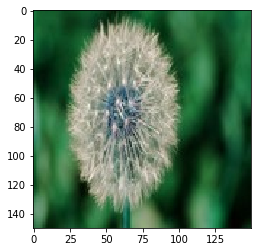

In [102]:
predictimg=cv2.imread("predictit.jpg",1)
predictimg=np.array(predictimg)
plt.imshow(predictimg)
predictimg=predictimg/255.0

predictimg = np.expand_dims(predictimg, axis=0)
predictimg.shape

In [103]:
predition=model.predict(predictimg)

predition=np.squeeze(predition)
print(predition)
predIndex=np.argmax(predition)

[9.9615628e-01 4.6225320e-04 3.3814039e-03]


In [104]:
print("The Species of given image is",species[predIndex])

The Species of given image is dandelion
